In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


## the RAte column is bit akward, we need to fix thatt by making it only the RATE

In [5]:
def rate(val) :
    val = str(val).split("/")
    val = val[0]
    return float(val)

In [6]:
df["rate"] = df["rate"].apply(rate)

df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
143    False
144    False
145    False
146    False
147    False
Length: 148, dtype: bool

In [8]:
df.describe()


,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


# 1) What type of restaurant do the majority of customers order from?

Text(0.5, 0, 'Type of resturent')

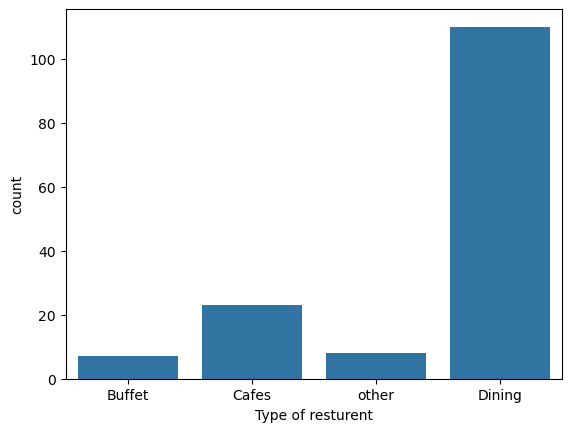

In [9]:
sns.countplot(x=df["listed_in(type)"])
plt.xlabel("Type of resturent")

Text(0.5, 1.0, 'Type Distribution')

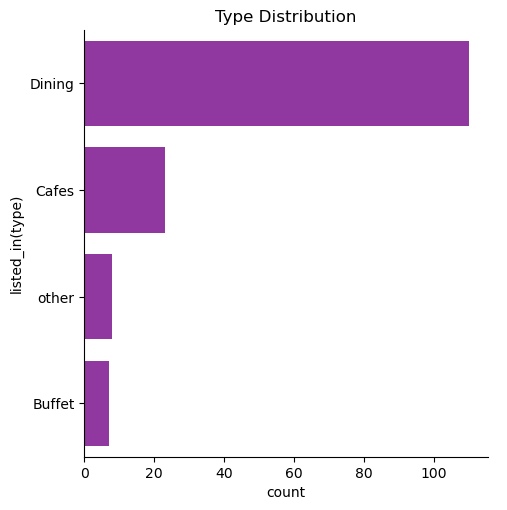

In [14]:
sns.catplot(y='listed_in(type)', data = df, kind = 'count', 
            order = df['listed_in(type)'].value_counts().sort_values(ascending= False).index, color="#9C27B0")
plt.title("Type Distribution")

## ans -> type of restaurant do the majority of customers order from --> DINING

# --

In [10]:
def catagory(df, col, label, col2):
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()["max"]
    ]

    df[col2] = pd.cut(df[col],edges,labels = label, duplicates="drop")
    
    return df

In [11]:
label = ["not popular", "Below avg", "Avg", "Good"]
col2 = "Catagory"

In [12]:
catagory(df, 'rate', label, col2)

df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),Catagory
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,Good
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,Good
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,Avg
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,Below avg
4,Grand Village,No,No,3.8,166,600,Buffet,Avg


# --

#  How many votes has each type of restaurant received from customers?

<Axes: xlabel='votes', ylabel='listed_in(type)'>

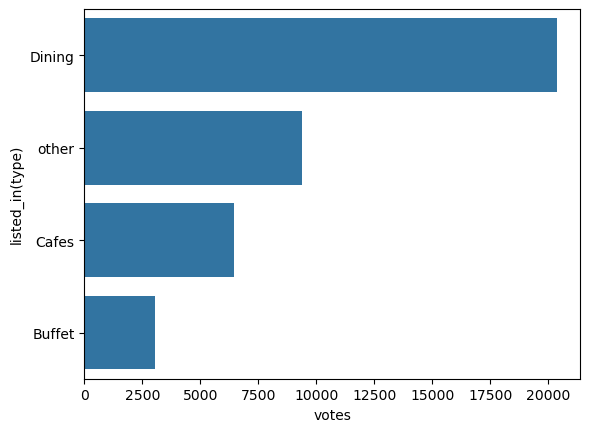

In [13]:
type_vote = df.groupby('listed_in(type)', as_index=False)['votes'].sum().sort_values(by='votes' ,ascending=False)
sns.barplot(data = type_vote, x = 'votes',y='listed_in(type)' )

Text(0, 0.5, 'Vote count')

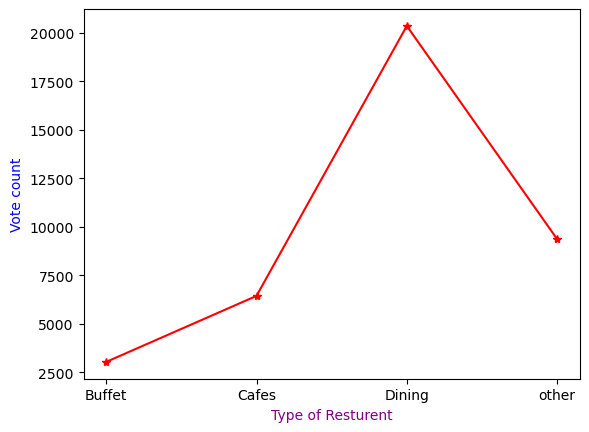

In [19]:
g_data = df.groupby("listed_in(type)")['votes'].sum()
result = pd.DataFrame({'votes':g_data})
plt.plot(result, c = 'red', marker = '*')
plt.xlabel("Type of Resturent", c= "purple")
plt.ylabel("Vote count", c = 'blue')

## So we see its Clear DINING got the most number of  Votes

# 3) What are the ratings that the majority of restaurants have received?

Text(0.5, 1.0, 'Rating Distribution')

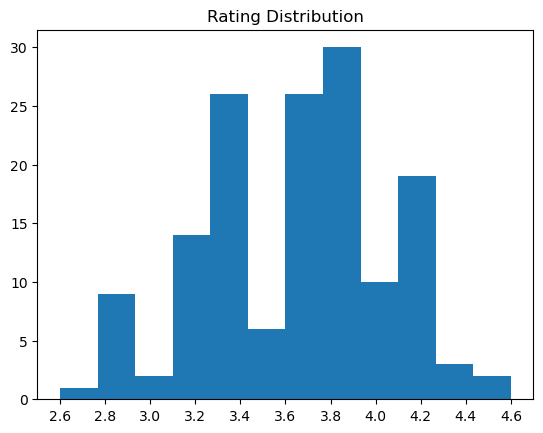

In [28]:
plt.hist(df['rate'],bins = 12)
plt.locator_params(axis='x', nbins=20)   # auto add ~20 ticks
plt.title('Rating Distribution')

#### BAR and HISt look same here as this are continuos FLOAT VALUES

Text(0, 0.5, 'Count')

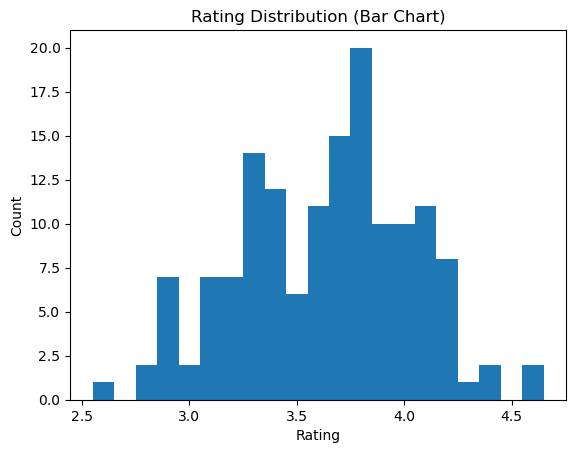

In [32]:
counts = df['rate'].value_counts().sort_index()

plt.bar(counts.index, counts.values, width=0.1)  # width small → real bars
plt.title("Rating Distribution (Bar Chart)")
plt.xlabel("Rating")
plt.ylabel("Count")




###### The majority of restaurants have ratings between 3.3 and 4.0.

### More specifically:
* The tallest bar (highest frequency) is clearly around 3.8–4.0
* The next tallest bars are in the 3.6–3.7 and 3.3-3.4 range
* The bars below 3.0 and above 4.3 are very small (almost none)
